In [1]:
import os, shutil

In [87]:
orignal_dataset_dir = 'C:/Users/Haier/Dataset/dogs-vs-cats/train/train' # for complete examples 

In [5]:
base_dir = 'C:/Users/Haier/Dataset/dogs-vs-cats/cats_and_dogs_small'     # for the samller dataset for tarining/testing 
os.mkdir(base_dir)

In [6]:
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)

In [7]:
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)

In [8]:
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [9]:
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

In [10]:
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

In [11]:
# repeat the above procedure for validation and test directories 
validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)

In [12]:
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

In [13]:
test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)

In [14]:
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

copy first 1000 images to train directory 

In [84]:
frames = ['cat.{}.jpg'.format(i) for i in range(1000)]

In [88]:
for fname in frames:
    src = os.path.join(orignal_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)

In [92]:
frames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in frames:
    src = os.path.join(orignal_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)

In [93]:
frames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in frames:
    src = os.path.join(orignal_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

In [89]:
frames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in frames:
    src = os.path.join(orignal_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [94]:
frames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in frames:
    src = os.path.join(orignal_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [95]:
frames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in frames:
    src = os.path.join(orignal_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [56]:
#?str

In [97]:
#mypath = os.path.join('c:\\', 'sourcedir').replace('\\','/')

In [96]:
#print(mypath)

Display the training, validation and testing examples from the dataset 

In [99]:
print('total training cat examples: ',len(os.listdir(train_cats_dir)))
print('total training dog examples: ',len(os.listdir(train_dogs_dir)))
print('total validation cat examples: ',len(os.listdir(validation_cats_dir)))
print('total validation dog examples: ',len(os.listdir(validation_dogs_dir)))
print('total testing cat examples: ',len(os.listdir(test_cats_dir)))
print('total testing dog examples: ',len(os.listdir(test_dogs_dir)))

total training cat examples:  1000
total training dog examples:  1000
total validation cat examples:  500
total validation dog examples:  500
total testing cat examples:  500
total testing dog examples:  500


Defining our network/model

In [100]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [103]:
model = models.Sequential()

# convolution layers
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

# fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [104]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

Defining optimizer and loss function

In [189]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['acc'])

Data preprocessing (Keras utilities help us)

In [106]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) # divided each image by 255
test_datagen = ImageDataGenerator(rescale=1./255) # divided each image by 255

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150)
                                                    ,batch_size=20,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150)
                                                        ,batch_size=20,class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [113]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ',data_batch.shape)
    print('labels batch size: ',labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch size:  (20,)


Fitting of a model (Training)

In [115]:
history = model.fit_generator(train_generator,steps_per_epoch=100,
                              epochs=30, validation_data=validation_generator,validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 96s 962ms/step - loss: 0.6923 - acc: 0.5185 - val_loss: 0.6785 - val_acc: 0.5040
Epoch 2/30
100/100 [==============================] - 83s 828ms/step - loss: 0.6573 - acc: 0.6010 - val_loss: 0.6329 - val_acc: 0.6450
Epoch 3/30
100/100 [==============================] - 87s 866ms/step - loss: 0.6123 - acc: 0.6660 - val_loss: 0.6182 - val_acc: 0.6500
Epoch 4/30
100/100 [==============================] - 82s 823ms/step - loss: 0.5692 - acc: 0.6950 - val_loss: 0.5886 - val_acc: 0.6720
Epoch 5/30
100/100 [==============================] - 82s 820ms/step - loss: 0.5378 - acc: 0.7205 - val_loss: 0.5951 - val_acc: 0.6710
Epoch 6/30
100/100 [==============================] - 82s 818ms/step - loss: 0.5203 - acc: 0.7295 - val_loss: 0.6179 - val_acc: 0.6670
Epoch 7/30
100/100 [==============================] - 86s 860ms/step - loss: 0.4947 - acc: 0.7535 - val_loss: 0.6550 - val_acc: 0.6460
Epoch 8

Saving of a model

In [116]:
model.save('cats_and_dogs_small_1.h5')

Ploting Training and Validation Loss 

In [117]:
import matplotlib.pyplot as plt

In [119]:
acc = history.history['acc']

In [121]:
len(acc)

30

In [123]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [124]:
train_loss = history.history['loss']

In [125]:
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

In [199]:
epochs= range(1,len(acc)+1)

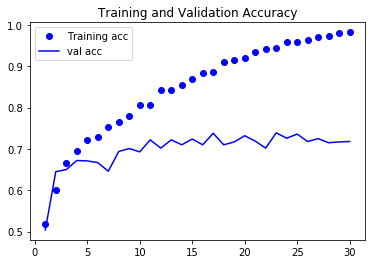

In [129]:
plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'val acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

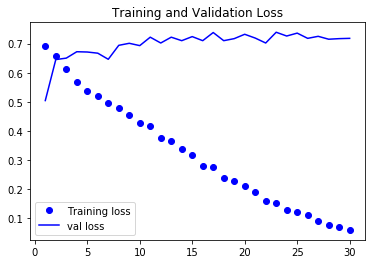

In [130]:
plt.plot(epochs,train_loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'val loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Analysis: As the dataset is small so there is a problem of overfitting, In order to reduce the overfitting we can do:
* Data Augmentation 
* Dropout
* Weight deay (L1 or L2 Regularization)
* Use a simpler model 

1) use data augmentation

In [131]:
# Displaying some randomly augmented training images 

In [164]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip = True,
                             fill_mode='nearest' )

In [134]:
from keras.preprocessing import image 

fnames = [os.path.join(train_cats_dir, fname).replace('\\','/') for fname in os.listdir(train_cats_dir)]

img_path = fnames[3] # choose one image to augment 

In [135]:
img_path

'C:/Users/Haier/Dataset/dogs-vs-cats/cats_and_dogs_small/train/cats/cat.100.jpg'

In [141]:
img = image.load_img(img_path,target_size=(150,150)) #load and resize the image 

In [140]:
type(img)

PIL.Image.Image

In [156]:
x = image.img_to_array(img)

In [159]:
x = x.reshape((1,) +x.shape)

In [161]:
x.shape

(1, 150, 150, 3)

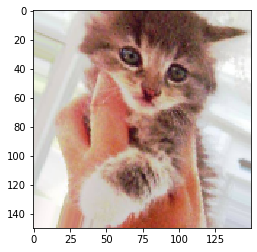

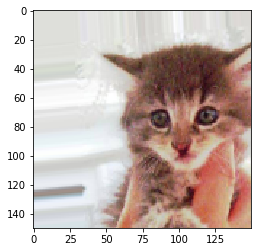

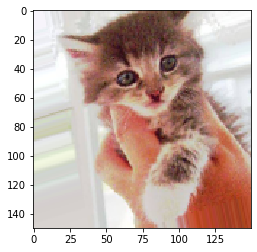

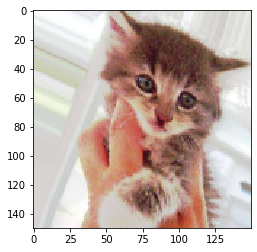

In [171]:
i=0 

for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4 == 0:
        break
    
plt.show()

2) Add dropout

In [172]:
model = models.Sequential()

# convolution layers
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

# fully connected layers
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


  Train by adding dropout and performing the data augmetation 

In [173]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range= 40,
                                  width_shift_range= 0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
                                 

In [174]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [175]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),
                                                   batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [187]:
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),
                                                       batch_size=32,
                                                       class_mode='binary')

Found 1000 images belonging to 2 classes.


In [190]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs = 10,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/10
100/100 [==============================] - 183s 2s/step - loss: 0.6954 - acc: 0.5216 - val_loss: 0.6816 - val_acc: 0.5121
Epoch 2/10
100/100 [==============================] - 129s 1s/step - loss: 0.6795 - acc: 0.5606 - val_loss: 0.8089 - val_acc: 0.4916
Epoch 3/10
100/100 [==============================] - 131s 1s/step - loss: 0.6772 - acc: 0.5722 - val_loss: 0.6454 - val_acc: 0.6206
Epoch 4/10
100/100 [==============================] - 127s 1s/step - loss: 0.6597 - acc: 0.6081 - val_loss: 0.6453 - val_acc: 0.6256
Epoch 5/10
100/100 [==============================] - 128s 1s/step - loss: 0.6386 - acc: 0.6359 - val_loss: 0.6078 - val_acc: 0.6561
Epoch 6/10
100/100 [==============================] - 151s 2s/step - loss: 0.6228 - acc: 0.6428 - val_loss: 0.6472 - val_acc: 0.6295
Epoch 7/10
100/100 [==============================] - 133s 1s/step - loss: 0.6074 - acc: 0.6650 - val_loss: 0.5879 - val_acc: 0.6834
Epoch 8/10
100/100 [==============================] - 135s 1s/step - 

In [196]:
history.history['val_acc'][9]

0.7151015228426396

In [201]:
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

In [202]:
train_loss = history.history['loss']
train_acc = history.history['acc']

In [204]:
epochs= range(1,len(train_acc)+1)

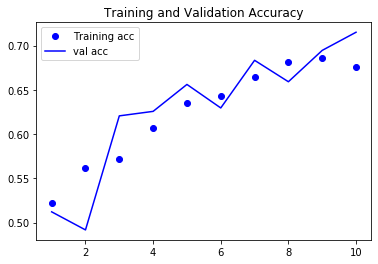

In [205]:
plt.plot(epochs,train_acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'val acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

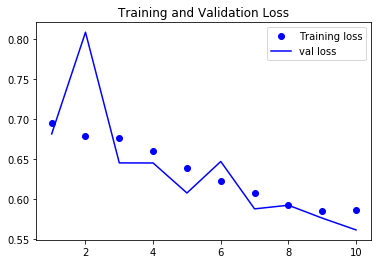

In [206]:
plt.plot(epochs,train_loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'val loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [207]:
model.save('cats_vs_dogs_small_dataset_aug_drop_model2.h5')

Analysis: It can be seen that by introducing the data augmenation and dropout the loss decresaes while the accuracy increses we can trained the above model to 100 epochs to achieve the accuracy of 86% to 87%, with adding the regularization and altering the model layers we can improve the results further

<------------------------------------------------------------------- END --------------------------------------------------------->